# Optimization exercise

## Goal: Train the 2nd order polynomial predictor using both gradient descent and stochastic gradient descent. Optimize the stepsizes and compare against scikit-learn implementation

1. Download data from https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing.
2. Create a function psi(x), which transforms features AST (assists), REB (rebounds) and STL (steals) into 2nd order polynomial features (add each feature squared and each pair of features multiplied with every other)
3. Create a transformed data matrix X, where each x is mapped to psi(x).
4. Create a function p2(x,w), which outputs the value of the polynomial at x for given parameters w.
5. Create a function Loss(X,y,w), which computes the squared loss of predicting y from X by p2(x,w) using parameters w. Take variable PTS as y. We will predict scored points based on assists, rebounds and steals.
6. Code up the gradient descent. It should input a point w and a stepsize.
7. Choose an arbitrary point and stepsize. Run gradient descent for 100 iterations and compute the Loss after each iteration. How does the loss behave? Does it converge to something?
8. Can you find the stepsize, for which the loss is smallest after 100 iterations?

In [61]:
import pandas as pd
import numpy as np
import itertools
import copy

In [82]:
data_path = ''
nb = pd.read_csv(data_path+'nba_games_2013_2015.csv', delimiter=';')
x = nb[['AST','REB','STL']]
y = nb['PTS']

In [83]:
x.head()

,AST,REB,STL
0,41,43,14
1,23,43,8
2,20,39,7
3,19,47,6
4,21,43,4


In [84]:
# Create a function psi(x), which transforms features AST (assists), REB (rebounds) and STL (steals) 
# into 2nd order polynomial features (add each feature squared and each pair of features multiplied with every other)
def psi(df,m):
    df2 = copy.deepcopy(df)
    for i in itertools.combinations_with_replacement(df.columns, m):
        col_name = f'{i[0]}'
        value = copy.deepcopy(df2[i[0]])
        for j in range(1,m):
            col_name += '_'+f'{i[j]}'
            value *= df2[i[j]]
        df2[col_name]=value
    return df2

In [240]:
# Create a function p2(x,w), which outputs the value of the polynomial at x for given parameters w
def p2(xs,w):
    return np.dot(xs,w)

In [88]:
# Create a function Loss(X,y,w), which computes the squared loss of predicting y from X by p2(x,w)
# using parameters w. Take variable PTS as y. We will predict scored points based on assists, rebounds and steals.
def Loss(X,y,w):
    return 1/len(y)*sum(w.T*X-y)^2

In [241]:
# Code up the gradient descent. It should input a point w and a stepsize.
def gradient_descent(x, y, w, iterations, eta):
    # prepare the empty lists for our history
    past_costs = []
    past_w = [w]
    # repeating for number of iteration times
    for i in range(iterations):
        # computing of prediction. Dot product of coeficients and values
        prediction = p2(x,w)
        print(prediction)
        # computation of error
        error = prediction - y
        # computation of overall cost for each iteration
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        # GRADIENT DESCENT part
        w = w - (eta * (1/m) * np.dot(x.T, error))
        past_w.append(w)
        
    return past_w, past_costs

In [242]:
# Create a transformed data matrix X, where each x is mapped to psi(x).
X_transformed = psi(x,2)
X_transformed = (X_transformed - X_transformed.mean()) / X_transformed.std()
eta = 0.000001
m = y.size #No. of data points
np.random.seed(123) #Set the seed
w = np.random.rand(10) #Pick some random values to start with - we are estimating 3
X_transformed = np.c_[np.ones(X_transformed.shape[0]), X_transformed]

In [243]:
w

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752])

In [244]:
# Choose an arbitrary point and stepsize. 
# Run gradient descent for 100 iterations and compute the Loss after each iteration. How does the loss behave? Does it converge to something?
#Pass the relevant variables to the function and get the new values back...
past_w, past_costs = gradient_descent(X_transformed, y, w, 100, eta)
w_last = past_w[-1]
cost_100 = past_costs[-1]
#Print the results...
#print("Gradient Descent: {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}".format(w_last[0], w_last[1], w_last[2],w_last[3],w_last[4],w_last[5],w_last[6],w_last[7],w_last[8],w_last[9]))
cost_100

[14.47318846  0.93361568 -1.58173595 ...  2.85409663  2.78566198
 -3.49490333]
[14.47334546  0.93371793 -1.58164279 ...  2.8542028   2.78576311
 -3.49481516]
[14.47350247  0.93382018 -1.58154964 ...  2.85430898  2.78586424
 -3.49472699]
[14.47365948  0.93392242 -1.58145648 ...  2.85441515  2.78596537
 -3.49463882]
[14.47381649  0.93402467 -1.58136332 ...  2.85452133  2.7860665
 -3.49455065]
[14.47397349  0.93412692 -1.58127017 ...  2.8546275   2.78616764
 -3.49446248]
[14.4741305   0.93422917 -1.58117701 ...  2.85473367  2.78626877
 -3.49437431]
[14.4742875   0.93433141 -1.58108386 ...  2.85483985  2.7863699
 -3.49428614]
[14.47444451  0.93443366 -1.5809907  ...  2.85494602  2.78647103
 -3.49419797]
[14.47460151  0.9345359  -1.58089755 ...  2.8550522   2.78657216
 -3.49410979]
[14.47475852  0.93463815 -1.58080439 ...  2.85515837  2.78667329
 -3.49402162]
[14.47491552  0.9347404  -1.58071124 ...  2.85526455  2.78677442
 -3.49393345]
[14.47507253  0.93484264 -1.58061808 ...  2.85537072  

5110.0939551282

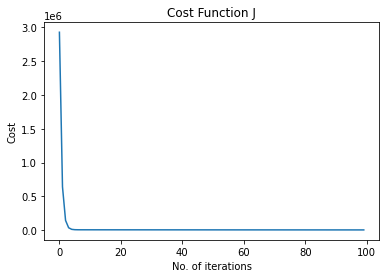

In [165]:
import matplotlib.pyplot as plt
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [236]:
# Can you find the stepsize, for which the loss is smallest after 100 iterations?
cost_100 = []
step = []
top = 1.0
bottom = 0.
eta = (top+bottom)/2
eta2 = 1
prev = 10.**250
m = y.size #No. of data points
while abs(eta-eta2)>np.finfo(float).eps:
    X_transformed = psi(x,2)
    X_transformed = (X_transformed - X_transformed.mean()) / X_transformed.std()
    np.random.seed(123) #Set the seed
    w = np.random.rand(10) #Pick some random values to start with - we are estimating 3
    X_transformed = np.c_[np.ones(X_transformed.shape[0]), X_transformed]
    past_w, past_costs = gradient_descent(X_transformed, y, w, 100, eta)
    cost_100.append(past_costs[-1])
    step.append(eta)
    if prev - past_costs[-1]>0:
        top = eta
    else:
        bottom = eta
    prev = past_costs[-1]
    eta2 = eta
    eta = (top+bottom)/2

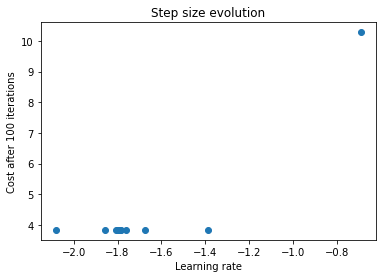

In [237]:
plt.title('Step size evolution')
plt.xlabel('Learning rate')
plt.ylabel('Cost after 100 iterations')
plt.scatter(np.log(step),np.log(cost_100))
plt.show()

In [238]:
min(cost_100)

46.40911282937023

In [239]:
step

[0.5,
 0.25,
 0.125,
 0.1875,
 0.15625,
 0.171875,
 0.1640625,
 0.16796875,
 0.166015625,
 0.1669921875,
 0.16650390625,
 0.166748046875,
 0.1666259765625,
 0.16668701171875,
 0.166656494140625,
 0.1666717529296875,
 0.16666412353515625,
 0.16666793823242188,
 0.16666603088378906,
 0.16666698455810547,
 0.16666650772094727,
 0.16666674613952637,
 0.16666662693023682,
 0.1666666865348816,
 0.1666666567325592,
 0.1666666716337204,
 0.1666666641831398,
 0.1666666679084301,
 0.16666666604578495,
 0.16666666697710752,
 0.16666666651144624,
 0.16666666674427688,
 0.16666666662786156,
 0.16666666668606922,
 0.1666666666569654,
 0.1666666666715173,
 0.16666666666424135,
 0.16666666666787933,
 0.16666666666606034,
 0.16666666666696983,
 0.16666666666651508,
 0.16666666666674246,
 0.16666666666662877,
 0.16666666666668561,
 0.1666666666666572,
 0.1666666666666714,
 0.1666666666666643,
 0.16666666666666785,
 0.16666666666666607,
 0.1666666666666652,
 0.16666666666666563]